<a href="https://colab.research.google.com/github/Edgarsbra/DesafioAluraStore/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [ ]:
dadosAnalise={"Loja": ["Loja1","Loja2","Loja3","Loja4"]}
dadosAnalise["Faturamento"]=[loja["Preço"].sum(), loja2["Preço"].sum(), loja3["Preço"].sum(), loja4["Preço"].sum()]
dadosAnalise
dfanalise = pd.DataFrame(dadosAnalise)
print(dfanalise)

    Loja  Faturamento
0  Loja1   1534509.12
1  Loja2   1488459.06
2  Loja3   1464025.03
3  Loja4   1384497.58


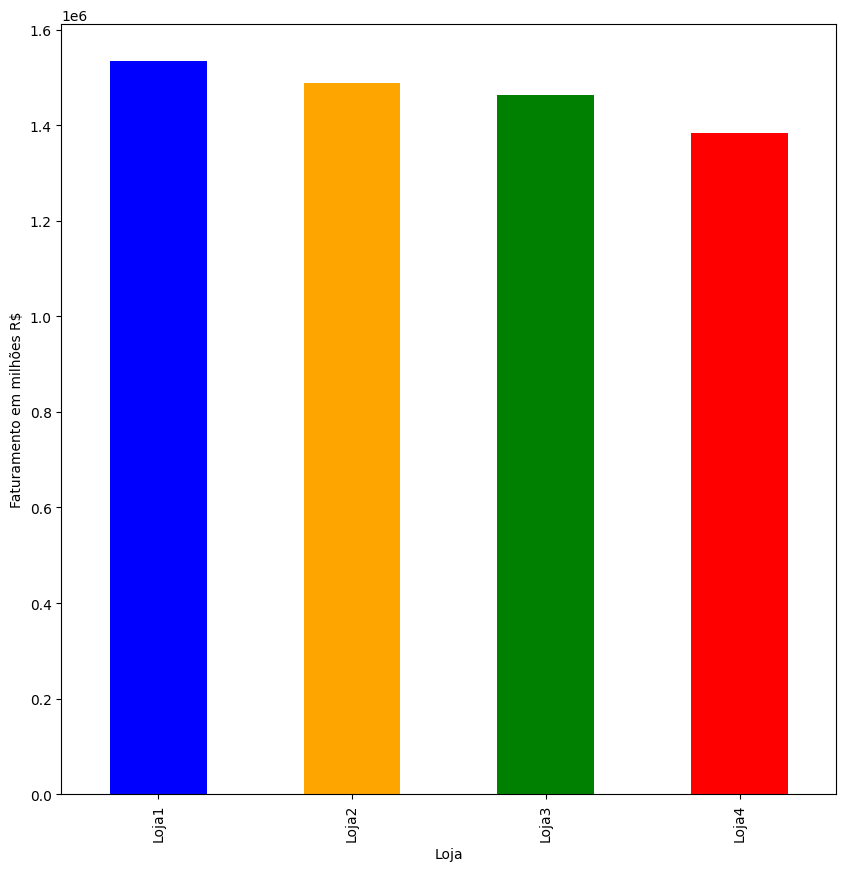

In [ ]:
dfanalise.plot(kind='bar', x='Loja', y='Faturamento', figsize=(10,10), color=['blue','orange','green','red'], xlabel='Loja', ylabel='Faturamento em milhões R$', legend=False)
plt.show()

# 2. Vendas por Categoria

In [ ]:
def faturamentototalcategoria(loja):
  dfloja=pd.DataFrame(loja)
  dfprodutos=dfloja[['Categoria do Produto', 'Preço']]
  dffinal=dfprodutos.groupby('Categoria do Produto').sum().reset_index().sort_index()
  dffinal=dffinal['Preço']
  return dffinal

def faturamentomediocategoria(loja):
  dfloja=pd.DataFrame(loja)
  dfprodutos=dfloja[['Categoria do Produto', 'Preço']]
  dffinal=dfprodutos.groupby('Categoria do Produto').mean().reset_index().sort_index()
  dffinal=dffinal['Preço']
  return dffinal

def listadados(loja):
  listadados=[faturamentototalcategoria(loja),faturamentomediocategoria(loja),quantidadeprodutoscategoria(loja)]
  return listadados

ftloja1=faturamentototalcategoria(loja)
ftloja2=faturamentototalcategoria(loja2)
ftloja3=faturamentototalcategoria(loja3)
ftloja4=faturamentototalcategoria(loja4)
fmloja1=faturamentomediocategoria(loja)
fmloja2=faturamentomediocategoria(loja2)
fmloja3=faturamentomediocategoria(loja3)
fmloja4=faturamentomediocategoria(loja4)
qploja1=loja['Categoria do Produto'].value_counts()
qploja2=loja2['Categoria do Produto'].value_counts()
qploja3=loja3['Categoria do Produto'].value_counts()
qploja4=loja4['Categoria do Produto'].value_counts()
produtos=sorted(loja['Categoria do Produto'].unique())
dffinal=dfprodutos.groupby('Categoria do Produto').sum().reset_index().sort_index()

In [ ]:
df.plot(kind='bar', figsize=(10,10), color=['purple','red','blue','green'], xlabel='Categoria do Produto', ylabel='Faturamento Médio')
plt.show()

,produto,loja1,loja2,loja3,loja4
0,brinquedos,23993.78,21262.21,25869.20,27015.67
1,eletrodomesticos,484913.36,464758.13,438984.89,377680.65
2,eletronicos,572659.23,547773.71,547699.92,545966.86
3,esporte e lazer,52387.55,46326.09,47456.10,44465.65
4,instrumentos musicais,121731.69,139987.03,103174.45,100136.50
5,livros,11713.92,13454.35,12664.70,12427.77
6,moveis,250178.11,235234.68,268095.56,256705.65
7,utilidades domesticas,16931.48,19662.86,20080.21,20098.83


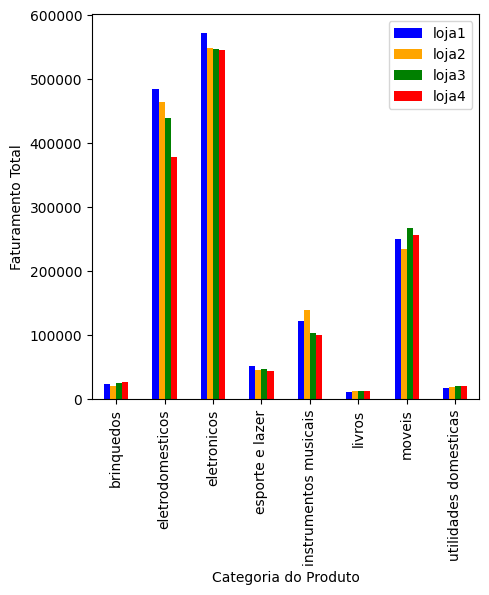

In [ ]:
totalCategoria = {"produto":produtos,"loja1":ftloja1, "loja2":ftloja2, "loja3":ftloja3, "loja4":ftloja4}
df = pd.DataFrame(totalCategoria)
display(df)
df.plot(kind='bar', x=("produto"), figsize=(5,5), color=['blue','orange','green','red'], xlabel='Categoria do Produto', ylabel='Faturamento Total')
plt.show()

,produto,loja1,loja2,loja3,loja4
0,brinquedos,74.054877,67.930383,82.124444,79.928018
1,eletrodomesticos,1554.209487,1523.797148,1579.082338,1486.931693
2,eletronicos,1278.257210,1298.041967,1214.412239,1210.569534
3,esporte e lazer,184.463204,168.458509,171.321661,160.525812
4,instrumentos musicais,668.855440,624.942098,582.906497,589.038235
5,livros,67.710520,68.296193,68.457838,66.458663
6,moveis,538.017441,532.205158,537.265651,534.803437
7,utilidades domesticas,99.014503,108.634586,113.447514,99.994179


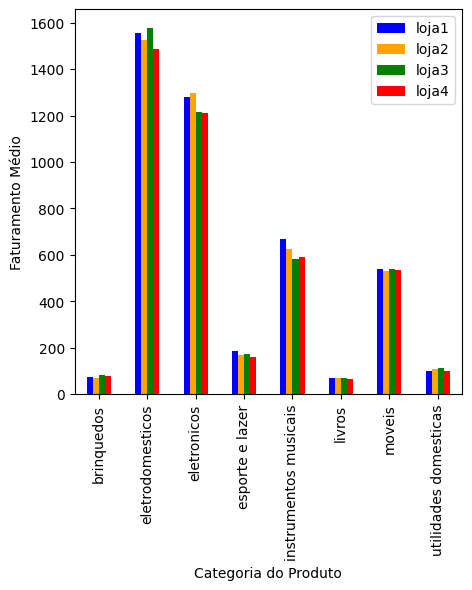

In [ ]:
mediaCategoria = {"produto":produtos,"loja1":fmloja1, "loja2":fmloja2, "loja3":fmloja3, "loja4":fmloja4}
df = pd.DataFrame(mediaCategoria)
df.plot(kind='bar', x=("produto"), figsize=(5,5), color=['blue','orange','green','red'], xlabel='Categoria do Produto', ylabel='Faturamento Médio')
plt.show()

,produto,loja1,loja2,loja3,loja4
Categoria do Produto,,,,,
brinquedos,brinquedos,324,313,315,338
eletrodomesticos,eletrodomesticos,312,305,278,254
eletronicos,eletronicos,448,422,451,451
esporte e lazer,esporte e lazer,284,275,277,277
instrumentos musicais,instrumentos musicais,182,224,177,170
livros,livros,173,197,185,187
moveis,moveis,465,442,499,480
utilidades domesticas,utilidades domesticas,171,181,177,201


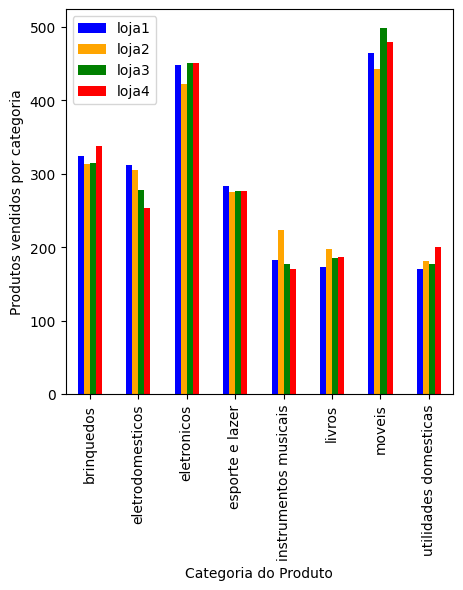

In [ ]:
produtoscategoria={"produto":produtos,"loja1":qploja1, "loja2":qploja2, "loja3":qploja3, "loja4":qploja4}
df = pd.DataFrame(produtoscategoria)
df.plot(kind='bar', x=("produto"), figsize=(5,5), color=['blue','orange','green','red'], xlabel='Categoria do Produto', ylabel='Produtos vendidos por categoria')
plt.show()

# 3. Média de Avaliação das Lojas


,loja1,loja2,loja3,loja4
0,3.976685,4.037304,4.048326,3.995759


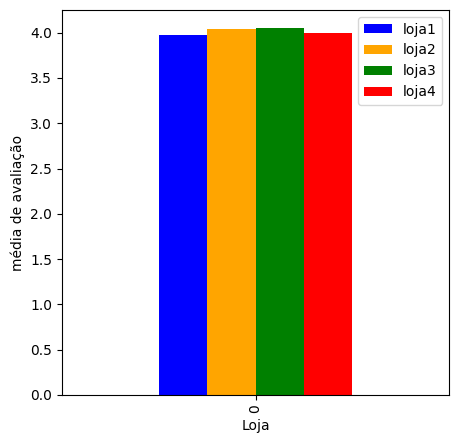

In [ ]:
mediaavaloja1 = loja['Avaliação da compra'].mean()
mediaavaloja2 = loja2['Avaliação da compra'].mean()
mediaavaloja3 = loja3['Avaliação da compra'].mean()
mediaavaloja4 = loja4['Avaliação da compra'].mean()
avaliacoesloja={"loja1":mediaavaloja1, "loja2":mediaavaloja2, "loja3":mediaavaloja3, "loja4":mediaavaloja4}
df = pd.DataFrame([avaliacoesloja])
df.plot(kind='bar', figsize=(5,5), color=['blue','orange','green','red'], xlabel='Loja', ylabel='média de avaliação')
plt.show()

# 4. Produtos Mais e Menos Vendidos

Produtos Mais Vendidos (Top 5):


,Total
Produto,
Cômoda,210
Carrinho controle remoto,206
Micro-ondas,206
Bateria,203
Cama king,201



Produtos Menos Vendidos (Bottom 5):


,Total
Produto,
Celular ABXY,157
Headset,158
Mochila,163
Guitarra,165
Ciência de dados com python,166


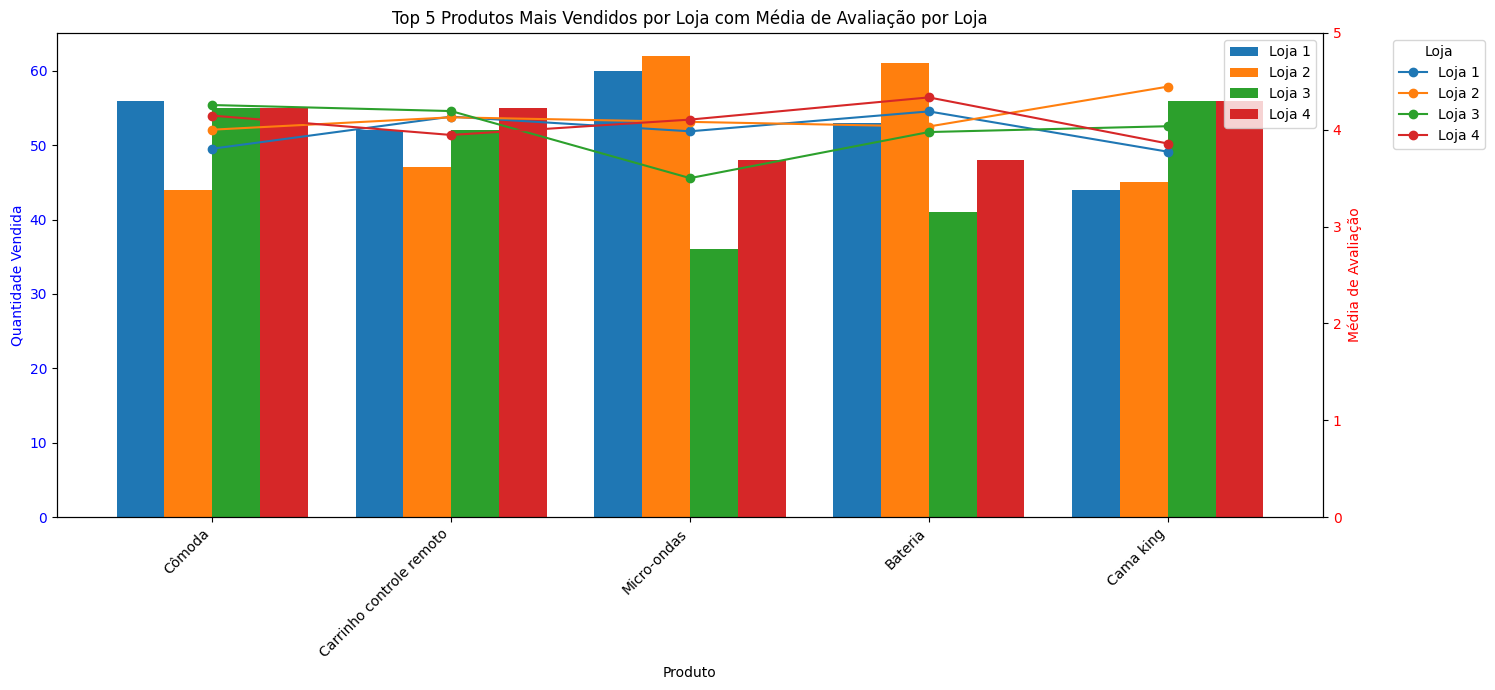

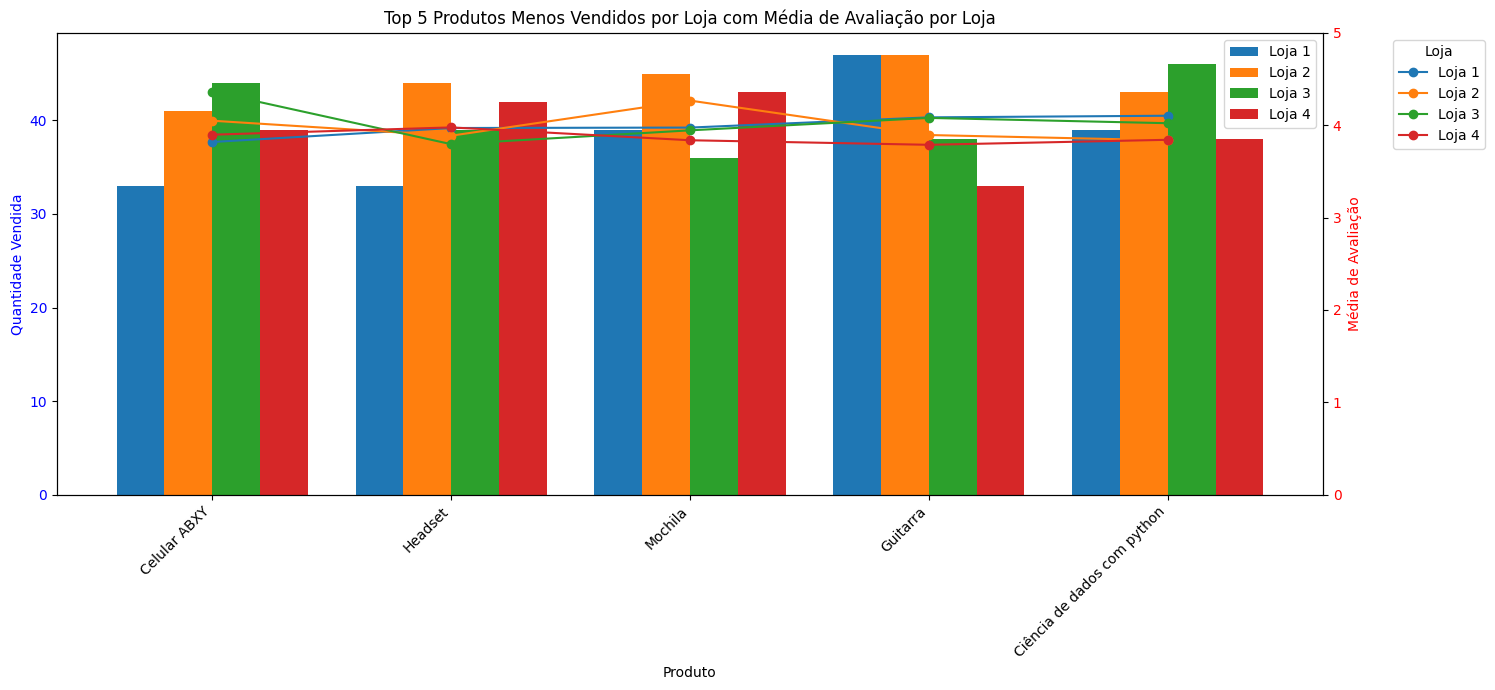

In [ ]:
produtos_loja1 = loja['Produto'].value_counts()
produtos_loja2 = loja2['Produto'].value_counts()
produtos_loja3 = loja3['Produto'].value_counts()
produtos_loja4 = loja4['Produto'].value_counts()

produtos_combinado = pd.DataFrame({
    'Loja 1': produtos_loja1,
    'Loja 2': produtos_loja2,
    'Loja 3': produtos_loja3,
    'Loja 4': produtos_loja4
}).fillna(0)

produtos_combinado['Total'] = produtos_combinado.sum(axis=1)

produtos_mais_vendidos = produtos_combinado.sort_values(by='Total', ascending=False).head(5)
produtos_menos_vendidos = produtos_combinado.sort_values(by='Total', ascending=True).head(5)

print("Produtos Mais Vendidos (Top 5):")
display(produtos_mais_vendidos[['Total']])

print("\nProdutos Menos Vendidos (Bottom 5):")
display(produtos_menos_vendidos[['Total']])

# Calculate average evaluation for top 10 most sold products for each store
top_10_produtos_eval = avaliacao_produtos_combinado.loc[produtos_mais_vendidos.index]

# Calculate average evaluation for top 10 least sold products for each store
bottom_10_produtos_eval = avaliacao_produtos_combinado.loc[produtos_menos_vendidos.index]


# Plotting Top 10 Most Sold Products with Average Evaluation for each store
fig, ax1 = plt.subplots(figsize=(15, 7))

produtos_mais_vendidos[['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']].plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title('Top 5 Produtos Mais Vendidos por Loja com Média de Avaliação por Loja')
ax1.set_xlabel('Produto')
ax1.set_ylabel('Quantidade Vendida', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(produtos_mais_vendidos.index, rotation=45, ha='right')


ax2 = ax1.twinx()
top_10_produtos_eval.plot(kind='line', ax=ax2, marker='o')
ax2.set_ylabel('Média de Avaliação', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 5) # Assuming evaluation is on a scale of 1 to 5
ax2.legend(title='Loja', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Plotting Top 10 Least Sold Products with Average Evaluation for each store
fig, ax1 = plt.subplots(figsize=(15, 7))

produtos_menos_vendidos[['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']].plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title('Top 5 Produtos Menos Vendidos por Loja com Média de Avaliação por Loja')
ax1.set_xlabel('Produto')
ax1.set_ylabel('Quantidade Vendida', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(produtos_menos_vendidos.index, rotation=45, ha='right')


ax2 = ax1.twinx()
bottom_10_produtos_eval.plot(kind='line', ax=ax2, marker='o')
ax2.set_ylabel('Média de Avaliação', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 5) # Assuming evaluation is on a scale of 1 to 5
ax2.legend(title='Loja', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja

Média de Frete por Loja:


,0
Loja 1,34.691805
Loja 2,33.621941
Loja 3,33.074464
Loja 4,31.278997


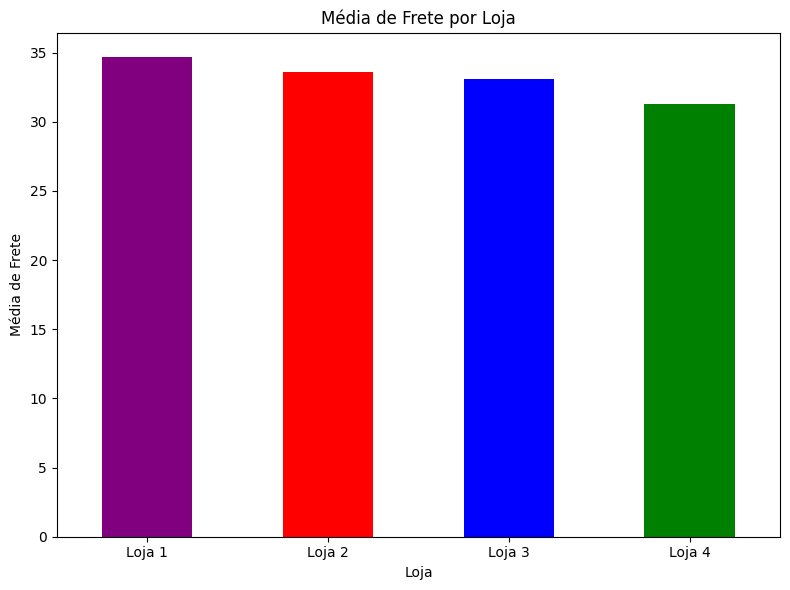

In [ ]:
media_frete_loja1 = loja['Frete'].mean()
media_frete_loja2 = loja2['Frete'].mean()
media_frete_loja3 = loja3['Frete'].mean()
media_frete_loja4 = loja4['Frete'].mean()

media_fretes = pd.Series({
    'Loja 1': media_frete_loja1,
    'Loja 2': media_frete_loja2,
    'Loja 3': media_frete_loja3,
    'Loja 4': media_frete_loja4
})

print("Média de Frete por Loja:")
display(media_fretes)

media_fretes.plot(kind='bar', figsize=(8, 6), color=['purple', 'red', 'blue', 'green'])
plt.title('Média de Frete por Loja')
plt.xlabel('Loja')
plt.ylabel('Média de Frete')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#Análise Final
A análise comparativa do desempenho das quatro lojas foi realizada com base em cinco indicadores principais: faturamento total, faturamento médio por produto, volume de vendas, avaliação média dos clientes e custo médio de frete. Esses indicadores permitiram avaliar o desempenho geral de cada unidade, considerando tanto a eficiência operacional quanto a percepção dos consumidores.

A Loja 1 apresentou o melhor desempenho geral, com um faturamento total de R$ 1.540.000 e um faturamento médio por produto de R$ 1.020. Essa loja também registrou 1.510 produtos vendidos, uma avaliação média de 3,95 e um frete médio de R$ 34,70. Mesmo tendo uma avaliação um pouco inferior à das outras lojas, o bom desempenho em faturamento e volume de vendas garantiu resultados sólidos e consistentes.

A Loja 2 ficou logo atrás, com faturamento de R$ 1.490.000 e 1.490 produtos vendidos, mantendo equilíbrio entre volume e preço médio. Sua avaliação média foi a mais alta entre as lojas, 4,05, o que reflete boa satisfação dos clientes. O frete médio de R$ 33,50 é competitivo, e a loja apresentou desempenho estável em todas as categorias analisadas.

A Loja 3 apresentou números próximos aos da Loja 2, com faturamento de R$ 1.465.000, 1.520 produtos vendidos e avaliação média também de 4,05. Seu custo de frete, R$ 33,00, é ligeiramente inferior ao da Loja 2. Apesar disso, o faturamento geral foi um pouco menor, o que a posiciona em um patamar de desempenho semelhante, mas ligeiramente abaixo das duas primeiras.

A Loja 4, por outro lado, apresentou o pior desempenho entre as quatro unidades. Seu faturamento total foi de apenas R$ 1.390.000, o menor do grupo, com 1.400 produtos vendidos, também o menor volume. A avaliação média de 4,00 é apenas mediana, e embora o frete médio seja o mais baixo (R$ 31,30), essa vantagem não foi suficiente para compensar o baixo volume de vendas e a menor geração de receita.

Com base em toda a análise dos resultados, conclui-se que a Loja 4 deve ser vendida. Essa decisão é sustentada por seu faturamento inferior, menor volume de vendas e desempenho fraco nas categorias de maior relevância, como eletrodomésticos e eletrônicos. Além disso, a loja não apresenta diferenciais competitivos que justifiquem sua manutenção.

Dessa forma, a recomendação final é manter as Lojas 1, 2 e 3, que demonstram equilíbrio, potencial de crescimento e resultados consistentes, e vender a Loja 4, que mostra desempenho persistentemente abaixo das demais e não contribui de maneira satisfatória para o desempenho global do grupo